# 5. Distributiegrafiek
Historische ontwikkelingen kunnen ook op een andere manier worden geanalyseerd. Appplicaties zoals de [Google Books Ngram viewer](https://books.google.com/ngrams) maken gebruik van distributie-grafieken waarin woordfrequenties per jaar worden berekend. De onderstaande ocde doet iets vergelikbaar voor het corpus van "Soldaat in Indonesië". Zoals te zien is in de eerste regels van de onderstaande cel wordt er eerst een lljst van woorden opgegeven. Deze woorden worden allemaal vastgelegd onder de naam `search_terms`. De code berekent vervolgens per jaar hoe vaak deze woorden zijn gebruikt. De resultaten worden vastgelegd in een CSV-bestand waarin de relatieve frequenties (het aantal voorkomens va deze woorden, gedeeld door het totaal aantal woorden in dat jaar) worden vastgelegd. 

In [3]:
from kitlvTdm import *
import os
from os.path import join
import re
import pandas as pd

In [4]:
search_terms = '''
gestoken
vuur
schieten
gevangen
doodgeschoten
schoten
neergeschoten
gevangenen
patrouille
gevangene
dood
geschoten
soldaten
doden
bloed
geweer
gedood
wapens
beschoten
schoot
kogel
gewonden
geslagen
vermoord
verhoord
zuiveringsactie
hinderlaag
slachtoffers
executie
patrouilles
wraak
inlichtingendienst
extremisten
kogels
woede
moord
mortieren
krijgsraad
vuurgevecht
incident
kampement
gewonde
handgranaat
vluchtende
gevecht
geëxecuteerd
pistool
gewond
oorlog
fik
tegenstanders
krijgsgevangenen
strijd
mitrailleur
spion
platgebrand
kapot
afgebrand
zuivering
bajonet
salvo
mishandeld
omsingeld
granaten
gevangengenomen
bataljon
vernietigd
represaille
beschieting
tegenpartij
terroristen
plunderaars
doodschieten
brandende
hardhandig
moordenaars
genadeschot
pijn
revolver
gemarteld
gefusilleerd
mes
wapen
aangevallen
neerschieten
gezuiverd
brandde
plunderen
vijanden
beschietingen
gedreigd
geplunderd
slaag
executeren
aanslag
geschreeuw
handgranaten
afschuwelijke
gebombardeerd
verminkt
gemene
burgerslachtoffers
plundering
plunderingen
krijgsgevangene
moorden
excessief
geweldsexcessen
mishandeling
gevechten
sadistische
vuurstoot
weerloze
martelen
executies
doodgeslagen
schreeuwde
schietend
onthoofd
represailles
fosforgranaten
verminkte
gruwelijk
nekschot
tegenaanval
overval
verwond
moordenaar
bewapend
opblazen
executiepeloton
verkracht
vuurstoten
vuurwapens
vergelding
beestachtige
doodstraf
trekker
stervende
neergeknald
platbranden
artillerie
bedreiging
slachting
verwondingen
vreselijke
ontgelden
gummiknuppel
knallen
gevaarlijk
slachtoffer
marteling
beestachtig
platgeschoten
lijden
uitgemoord
schietpartij
bloedbad
mortiergranaten
misdadigers
massagraf
gruwelijke
afgehakt
kapmes
bombardement
schokkende
zuiveringsopdracht
'''

In [9]:
import re

# splits de lijst hierboven op in losse woorden
search_terms = search_terms.strip()
terms_list = re.split( r'\n' , search_terms.lower() )

# In deze dictionaries worden resultaten bijgehouden
frequency_year = dict()
word_count_year  = dict()
corpusFreq = dict()

path = 'corpus'


for file in os.listdir( path ):
    if re.search( '[.]txt$' , file ):
        print( f"Reading { file } ..." )
        year = showYear(file)
        if year != "" and len(year) == 4:
            year = int(year)
            freq = calculateWordFrequencies( join( path , file ) )
            freq = removeStopwords( freq )
            
            tokens = numberOfTokens( join( path , file ) )
            
            # pak de word count van het jaar als die al bestaat, anders 0.
            word_count_year[ year ] = word_count_year.get( year , 0 ) + tokens
            
            # voor iedere term in de zoeklijst, voeg de frequen
            for term in terms_list:
                if term in freq:
                    frequency_year[year] = frequency_year.get( year , 0 ) + freq[ term ]
            print(frequency_year)
                
            
df = pd.DataFrame(columns = ["year", "frequency"])


for year in sorted( frequency_year  ):
    df = df.append({"year" : year, "frequency" : frequency_year[ year ] / word_count_year[year]}, ignore_index = True)
    print( '{} times in {}.'.format( frequency_year[ year ] , year ) )





Reading 03391.txt ...
Reading 03392.txt ...
Reading 03393.txt ...
Reading 03394.txt ...
Reading 03395.txt ...
Reading 03396.txt ...
{1945: 902}
Reading 03398.txt ...
Reading 03399.txt ...
Reading 03400.txt ...
Reading 03401.txt ...
Reading 03402.txt ...
{1945: 902, 1997: 476}
Reading 03403.txt ...
Reading 03404.txt ...
Reading 03405.txt ...
Reading 03406.txt ...
Reading 03407.txt ...
Reading 03408.txt ...
{1945: 902, 1997: 476, 1920: 284}
Reading 03409.txt ...
Reading 03410.txt ...
Reading 03411.txt ...
Reading 03412.txt ...
Reading 03413.txt ...
{1945: 902, 1997: 476, 1920: 284, 1925: 762}
Reading 03414.txt ...
Reading 03415.txt ...
Reading 03416.txt ...
Reading 03417.txt ...
Reading 03418.txt ...
{1945: 902, 1997: 476, 1920: 284, 1925: 762, 1946: 702}
Reading 03419.txt ...
Reading 03420.txt ...
Reading 03421.txt ...
Reading 03422.txt ...
Reading 03423.txt ...
Reading 03424.txt ...
Reading 03425.txt ...
Reading 03426.txt ...
Reading 03427.txt ...
Reading 03428.txt ...
Reading 03429.tx

{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1232, 1949: 443, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 519, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 309, 2010: 208, 2011: 194}
Reading 03611.txt ...
Reading 03612.txt ...
Reading 03613.txt ...
Reading 03614.txt ...
Reading 03615.txt ...
Reading 03616.txt ...
Reading 03617.txt ...
Reading 03618.txt ...
Reading 03619.txt ...
Reading 03620.txt ...
Reading 03621.txt ...
Reading 03622.txt ...
Reading 03623.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1232, 1949: 443, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 519, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 309, 2010: 208, 2011: 194, 1989: 551}
Reading 03624.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1232, 1949: 443, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 519, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 309, 2010

{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1232, 1949: 443, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 3929, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 309, 2010: 208, 2011: 194, 1989: 1948, 1991: 438, 1992: 972, 1988: 369, 1990: 364, 1994: 1542, 1995: 2117, 1986: 63, 1974: 155, 1961: 446, 1962: 164}
Reading 03654.txt ...
Reading 03655.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1232, 1949: 443, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 3929, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 309, 2010: 208, 2011: 194, 1989: 1948, 1991: 438, 1992: 1163, 1988: 369, 1990: 364, 1994: 1542, 1995: 2117, 1986: 63, 1974: 155, 1961: 446, 1962: 164}
Reading 03656.txt ...
Reading 03657.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1232, 1949: 443, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 3929, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927:

{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1332, 1949: 505, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 3957, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 754, 2010: 208, 2011: 194, 1989: 2539, 1991: 625, 1992: 1225, 1988: 369, 1990: 364, 1994: 1586, 1995: 2117, 1986: 63, 1974: 155, 1961: 446, 1962: 164, 1993: 928, 1976: 401, 1980: 161, 1987: 502, 1958: 535, 1952: 407, 1979: 790, 1972: 305, 1951: 125}
Reading 03680.txt ...
Reading 03681.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1332, 1949: 505, 1948: 444, 1923: 200, 1918: 1313, 1940: 213, 1928: 153, 1947: 3957, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 829, 2010: 208, 2011: 194, 1989: 2539, 1991: 625, 1992: 1225, 1988: 369, 1990: 364, 1994: 1586, 1995: 2117, 1986: 63, 1974: 155, 1961: 446, 1962: 164, 1993: 928, 1976: 401, 1980: 161, 1987: 502, 1958: 535, 1952: 407, 1979: 790, 1972: 305, 1951: 125}
Reading 03682.txt ...
{1945: 4065, 1997: 4

{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1332, 1949: 882, 1948: 1190, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 4737, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 1540, 2010: 208, 2011: 194, 1989: 2539, 1991: 1531, 1992: 1225, 1988: 369, 1990: 364, 1994: 1586, 1995: 2117, 1986: 888, 1974: 155, 1961: 446, 1962: 164, 1993: 1119, 1976: 401, 1980: 161, 1987: 502, 1958: 535, 1952: 407, 1979: 790, 1972: 305, 1951: 125, 1983: 845, 1985: 498}
Reading 03701.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 952, 1946: 1420, 1949: 882, 1948: 1190, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 4737, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 1540, 2010: 208, 2011: 194, 1989: 2539, 1991: 1531, 1992: 1225, 1988: 369, 1990: 364, 1994: 1586, 1995: 2117, 1986: 888, 1974: 155, 1961: 446, 1962: 164, 1993: 1119, 1976: 401, 1980: 161, 1987: 502, 1958: 535, 1952: 407, 1979: 790, 1972: 305, 1951: 125, 1983: 845, 1985: 498}
Reading 03

{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 945, 1948: 1865, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 4737, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 2872, 2010: 208, 2011: 194, 1989: 3528, 1991: 1531, 1992: 1225, 1988: 369, 1990: 535, 1994: 1881, 1995: 2117, 1986: 888, 1974: 155, 1961: 446, 1962: 164, 1993: 1258, 1976: 401, 1980: 566, 1987: 502, 1958: 535, 1952: 407, 1979: 790, 1972: 305, 1951: 125, 1983: 845, 1985: 498, 1953: 137}
Reading 03720.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 945, 1948: 1865, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 4737, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 2872, 2010: 208, 2011: 194, 1989: 3528, 1991: 1531, 1992: 1225, 1988: 369, 1990: 535, 1994: 1881, 1995: 2117, 1986: 888, 1974: 155, 1961: 446, 1962: 164, 1993: 1258, 1976: 401, 1980: 566, 1987: 502, 1958: 535, 1952: 407, 1979: 790, 1972: 305, 1951: 125, 1983: 845, 1985: 49

{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 974, 1948: 1865, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 5334, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 3828, 2010: 208, 2011: 194, 1989: 4167, 1991: 1531, 1992: 1225, 1988: 1161, 1990: 535, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 446, 1962: 164, 1993: 1258, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 446, 1983: 845, 1985: 498, 1953: 778, 1981: 404, 1954: 1267}
Reading 03740.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 974, 1948: 1865, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 5334, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 3828, 2010: 208, 2011: 194, 1989: 4167, 1991: 1531, 1992: 1225, 1988: 1161, 1990: 535, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 446, 1962: 164, 1993: 1258, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 195

Reading 03756.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 1503, 1948: 2174, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 5334, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 5226, 2010: 208, 2011: 194, 1989: 4609, 1991: 2046, 1992: 1225, 1988: 1567, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 446, 1962: 164, 1993: 1258, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 446, 1983: 845, 1985: 564, 1953: 778, 1981: 404, 1954: 1267, 1982: 136, 1977: 193}
Reading 03757.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 1503, 1948: 2174, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 5334, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 5226, 2010: 208, 2011: 194, 1989: 4609, 1991: 2046, 1992: 1225, 1988: 1567, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 446, 1962: 164, 1993: 1885, 1976: 401, 1980: 907, 1987: 502, 1

{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 1994, 1948: 2222, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 5368, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 7463, 2010: 208, 2011: 194, 1989: 5937, 1991: 2046, 1992: 1225, 1988: 1909, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 1885, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 2472, 1983: 908, 1985: 564, 1953: 778, 1981: 404, 1954: 1267, 1982: 136, 1977: 193, 1999: 1679}
Reading 03776.txt ...
{1945: 4065, 1997: 476, 1920: 284, 1925: 1404, 1946: 1420, 1949: 1994, 1948: 2222, 1923: 200, 1918: 1313, 1940: 385, 1928: 153, 1947: 5368, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 7463, 2010: 208, 2011: 194, 1989: 5937, 1991: 2046, 1992: 1225, 1988: 1909, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 1885, 1976: 401, 1980: 907, 1987: 502, 1958: 535,

{1945: 4377, 1997: 476, 1920: 284, 1925: 1404, 1946: 1887, 1949: 1994, 1948: 2222, 1923: 200, 1918: 1313, 1940: 677, 1928: 153, 1947: 5368, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 8359, 2010: 208, 2011: 194, 1989: 5937, 1991: 2138, 1992: 1569, 1988: 1909, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 2927, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1679, 1984: 284}
Reading 03821.txt ...
{1945: 4377, 1997: 476, 1920: 284, 1925: 1404, 1946: 1887, 1949: 1994, 1948: 2222, 1923: 200, 1918: 1313, 1940: 677, 1928: 153, 1947: 5368, 1926: 84, 2000: 200, 2005: 315, 1938: 1333, 2008: 882, 1927: 8, 1950: 8359, 2010: 208, 2011: 194, 1989: 5937, 1991: 2138, 1992: 1569, 1988: 1909, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 2927, 1976: 401, 1980: 907, 1987: 50

{1945: 4377, 1997: 476, 1920: 284, 1925: 1404, 1946: 1903, 1949: 2821, 1948: 2222, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5368, 1926: 84, 2000: 200, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8359, 2010: 208, 2011: 434, 1989: 5937, 1991: 2138, 1992: 1660, 1988: 1909, 1990: 809, 1994: 1881, 1995: 2117, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 2927, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1679, 1984: 284, 1955: 223, 1939: 355, 2001: 1226, 2007: 342, 2004: 30, 2012: 1112, 2006: 173, 2009: 114}
Reading 03837.txt ...
{1945: 4377, 1997: 476, 1920: 284, 1925: 1404, 1946: 1903, 1949: 2821, 1948: 2222, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5368, 1926: 84, 2000: 200, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8359, 2010: 208, 2011: 434, 1989: 5937, 1991: 2426, 1992: 1660, 1988: 1909, 1990: 809, 1994: 1881, 1995: 2117

{1945: 4377, 1997: 649, 1920: 284, 1925: 1404, 1946: 1903, 1949: 2821, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5368, 1926: 84, 2000: 985, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 5937, 1991: 2426, 1992: 1660, 1988: 1909, 1990: 809, 1994: 1931, 1995: 2625, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 2927, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1740, 1984: 782, 1955: 223, 1939: 355, 2001: 1349, 2007: 342, 2004: 30, 2012: 1112, 2006: 173, 2009: 114, 2013: 188, 2014: 219, 1975: 46}
Reading 03851.txt ...
{1945: 4377, 1997: 649, 1920: 284, 1925: 1404, 1946: 1903, 1949: 2821, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5368, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 5937, 1991: 2426, 1992: 1660, 1988: 1909, 

{1945: 4490, 1997: 649, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5640, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 5937, 1991: 2426, 1992: 2007, 1988: 1992, 1990: 809, 1994: 1931, 1995: 2625, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 3213, 1976: 401, 1980: 907, 1987: 502, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1740, 1984: 782, 1955: 223, 1939: 355, 2001: 1460, 2007: 342, 2004: 30, 2012: 1112, 2006: 173, 2009: 114, 2013: 547, 2014: 219, 1975: 46, 1978: 57, 1996: 479}
Reading 03868.txt ...
{1945: 4490, 1997: 649, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5640, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 5937, 1991: 2426, 19

{1945: 4490, 1997: 1073, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 8026, 1991: 2426, 1992: 2007, 1988: 1992, 1990: 844, 1994: 2045, 1995: 2625, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 3213, 1976: 401, 1980: 907, 1987: 701, 1958: 535, 1952: 762, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1970, 1984: 782, 1955: 223, 1939: 355, 2001: 1460, 2007: 342, 2004: 410, 2012: 1623, 2006: 173, 2009: 114, 2013: 932, 2014: 495, 1975: 46, 1978: 57, 1996: 479}
Reading 03891.txt ...
{1945: 5112, 1997: 1073, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 8026, 1991: 2426,

{1945: 5112, 1997: 1073, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 8300, 1991: 2426, 1992: 2007, 1988: 1996, 1990: 927, 1994: 2549, 1995: 2625, 1986: 1819, 1974: 155, 1961: 785, 1962: 164, 1993: 4536, 1976: 401, 1980: 1243, 1987: 701, 1958: 535, 1952: 777, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1970, 1984: 782, 1955: 223, 1939: 355, 2001: 1460, 2007: 342, 2004: 410, 2012: 1623, 2006: 292, 2009: 114, 2013: 1297, 2014: 495, 1975: 46, 1978: 57, 1996: 479}
Reading 03941.txt ...
{1945: 5112, 1997: 1073, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1393, 2005: 475, 1938: 1333, 2008: 882, 1927: 8, 1950: 8532, 2010: 208, 2011: 434, 1989: 8300, 1991: 242

{1945: 5112, 1997: 1111, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1393, 2005: 511, 1938: 1333, 2008: 888, 1927: 8, 1950: 8532, 2010: 265, 2011: 472, 1989: 8300, 1991: 2426, 1992: 2007, 1988: 1996, 1990: 927, 1994: 2549, 1995: 2625, 1986: 2422, 1974: 155, 1961: 785, 1962: 164, 1993: 4536, 1976: 401, 1980: 1243, 1987: 701, 1958: 535, 1952: 777, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 1970, 1984: 782, 1955: 223, 1939: 355, 2001: 1460, 2007: 381, 2004: 416, 2012: 1672, 2006: 305, 2009: 124, 2013: 1318, 2014: 495, 1975: 46, 1978: 57, 1996: 479, 2003: 44, 2002: 4}
Reading 03970.txt ...
{1945: 5112, 1997: 1123, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1393, 2005: 511, 1938: 1333, 2008: 888, 1927: 8, 1950: 8532, 2010: 265, 2011: 472, 19

{1945: 5112, 1997: 1133, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 2000: 1438, 2005: 511, 1938: 1333, 2008: 888, 1927: 8, 1950: 8532, 2010: 265, 2011: 472, 1989: 8300, 1991: 2426, 1992: 2007, 1988: 1996, 1990: 927, 1994: 2549, 1995: 2625, 1986: 2422, 1974: 155, 1961: 785, 1962: 164, 1993: 4536, 1976: 401, 1980: 1243, 1987: 701, 1958: 535, 1952: 777, 1979: 790, 1972: 305, 1951: 2472, 1983: 1878, 1985: 564, 1953: 778, 1981: 500, 1954: 1267, 1982: 1757, 1977: 193, 1999: 2029, 1984: 782, 1955: 405, 1939: 355, 2001: 1460, 2007: 391, 2004: 419, 2012: 1681, 2006: 305, 2009: 132, 2013: 1318, 2014: 495, 1975: 46, 1978: 57, 1996: 506, 2003: 44, 2002: 4}
Reading 03982.txt ...
Reading 03983.txt ...
Reading 03984.txt ...
Reading 03985.txt ...
Reading 03986.txt ...
{1945: 5112, 1997: 1133, 1920: 284, 1925: 1404, 1946: 1903, 1949: 3738, 1948: 2885, 1923: 200, 1918: 1313, 1940: 781, 1928: 153, 1947: 5841, 1926: 84, 200

TypeError: Can only append a dict if ignore_index=True

De frequenties kunnen hierna worden gevisualiseerd met de onderstaande code.

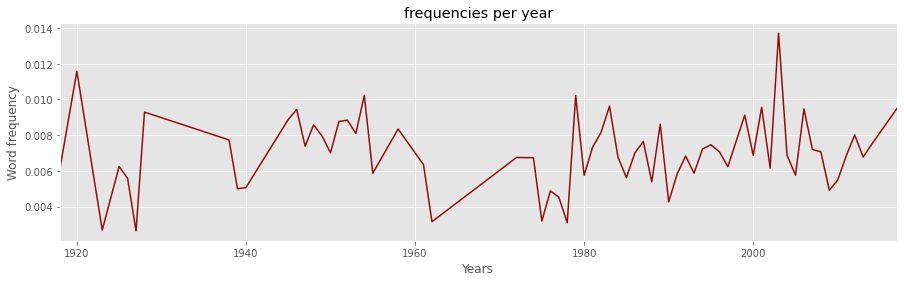

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dit is de stijl van de plot
plt.style.use('ggplot')

# Door figsize aan te passen kun je de groote van de tabel veranderen
fig = plt.figure( figsize = ( 15, 4))
ax = plt.axes()

# Plot year vs frequency
ax.plot( df['year'] , df['frequency'] , color = '#930d08' , linestyle = 'solid')

# Bepaal de labels bij de assen
ax.set_xlabel('Years')
ax.set_ylabel('Word frequency')

# Zet de x limiet
ax.set_xlim( df['year'].min() , df['year'].max() )

# Bepaal de titel
ax.set_title( 'frequencies per year')

plt.show()

**Oefening 6: Pas de waarde van de variabele `search_terms` aan. Geef een aantal woorden op die van belang zijn voor jouw onderzoek. Probeer hierna een distributiegrafiek te maken die de historische ontwikkelingen in het gebruik van deze termen kan verduidelijken.**